# Thermopower Analysis

## Temperature Variation

Here we work with the variation of temperature in both fridge and high temperature.

Results were generated using "*./thermopower_simulation.py*". Temperature range for high values was set from 50mk to 500mk. For each value of T_high, we simulate with T_fridge from 0.005 to T_high.


In [40]:
# Library import
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [41]:
# Data Import
T_hot = np.arange(0.010,0.5, 0.005)
T_fridge = np.arange(0.005,0.495, 0.005)

df = pd.read_csv("./data/TVar_Thot-0.01-0.495-step0.005_Tcold-0.005-0.49.csv", )
data = df.values

### Fixed T_high

We fix T_high to a certain value and we see how as T_fridge increases, what we observe in the curvature of the L shape mesh.

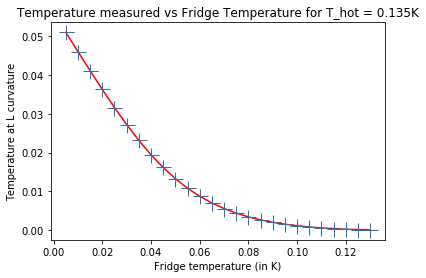

In [45]:
index = 25
T_hot_val = T_hot[index]
T_meas = data[index]

x = []
y = []

for i in range(len(T_meas)):
    if T_meas[i] > 0:
        x.append(T_fridge[i])
        y.append(T_meas[i]-T_fridge[i])
    
        
plt.xlabel("Fridge temperature (in K)")   
plt.ylabel("Temperature at L curvature")
title = "Temperature measured vs Fridge Temperature for T_hot = " + str(T_hot_val) + "K"
plt.title(title)
plt.plot(x, y, c="red")
plt.plot(x, y, "+", markersize=15)
plt.show()

### Fixed T_fridge

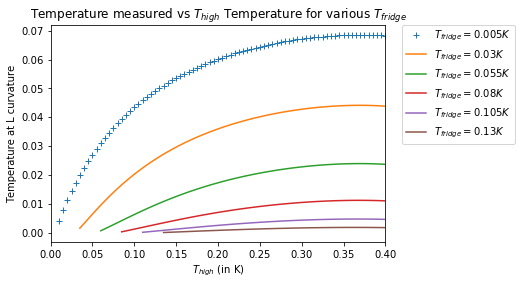

In [11]:
index1 = 0
T_fridge_val1 = T_fridge[index1]

index2 = 5
T_fridge_val2 = T_fridge[index2]

index3 = 10
T_fridge_val3 = T_fridge[index3]

index4 = 15
T_fridge_val4 = T_fridge[index4]

index5 = 20
T_fridge_val5 = T_fridge[index5]

index6 = 25
T_fridge_val6 = T_fridge[index6]

x1 = []
y1 = []
x2 = []
y2 = []
x3 = []
y3 = []
x4 = []
y4 = []
x5 = []
y5 = []
x6 = []
y6 = []


for i in range(len(data)):
    T_meas = data[i]
    for j in range(len(T_meas)):
        if T_meas[j] > 0 and T_fridge[j] == T_fridge_val1:
            x1.append(T_hot[i])
            y1.append(T_meas[j]-T_fridge[j])
        elif T_meas[j] > 0 and T_fridge[j] == T_fridge_val2:
            x2.append(T_hot[i])
            y2.append(T_meas[j]-T_fridge[j])
        elif T_meas[j] > 0 and T_fridge[j] == T_fridge_val3:
            x3.append(T_hot[i])
            y3.append(T_meas[j]-T_fridge[j])
        elif T_meas[j] > 0 and T_fridge[j] == T_fridge_val4:
            x4.append(T_hot[i])
            y4.append(T_meas[j]-T_fridge[j])   
        elif T_meas[j] > 0 and T_fridge[j] == T_fridge_val5:
            x5.append(T_hot[i])
            y5.append(T_meas[j]-T_fridge[j])   
        elif T_meas[j] > 0 and T_fridge[j] == T_fridge_val6:
            x6.append(T_hot[i])
            y6.append(T_meas[j]-T_fridge[j])
   

label1 = "$T_{fridge} = " + str(T_fridge_val1) + "K$"
label2 = "$T_{fridge} = " + str(T_fridge_val2) + "K$"
label3 = "$T_{fridge} = " + str(T_fridge_val3) + "K$"
label4 = "$T_{fridge} = " + str(T_fridge_val4) + "K$"
label5 = "$T_{fridge} = " + str(T_fridge_val5) + "K$"
label6 = "$T_{fridge} = " + str(T_fridge_val6) + "K$"

plt.plot(x1, y1, "+", label=label1)
plt.plot(x2, y2, label=label2)
plt.plot(x3, y3, label=label3)
plt.plot(x4, y4, label=label4)
plt.plot(x5, y5, label=label5)
plt.plot(x6, y6, label=label6)

plt.xlabel("$T_{high}$ (in K)")   
plt.ylabel("Temperature at L curvature")
title = "Temperature measured vs $T_{high}$ Temperature for various $T_{fridge}$"
plt.legend(bbox_to_anchor=(1.05, 1),loc=2, borderaxespad=0.)
plt.xlim(0,0.4)
plt.title(title)
plt.show()

### T_high x T_fridge Space

We now want to see on the whole space how temperature evolves. The following plots the variation of the temperature measured as both T_high and T_fridge vary.

In [5]:
dict_temp = {}
for i in range(len(T_hot)):
    t_data = data[i]
    
    for j in range(len(t_data)):
        if t_data[j] > 0:
            dict_temp[T_hot[i], T_fridge[j]] = t_data[j]-T_fridge[j]
 
keys = dict_temp.keys()
temperature = []; t_hot = []; t_fridge = []
for key in keys:
    temperature.append(float(dict_temp[key]))
    t_hot.append(float(key[0]))
    t_fridge.append(float(key[1]))

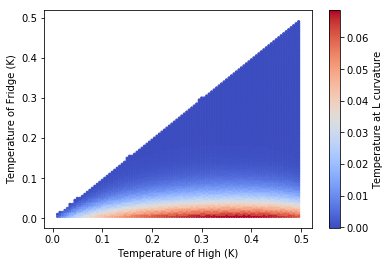

In [6]:
color_by = temperature
label = 'Temperature at L curvature' 
max_color_by = max(color_by)
min_color_by = min(color_by)


fig, ax = plt.subplots()
s = ax.scatter(t_hot, t_fridge,
               c=color_by,
               s=5,
               marker='o',                   # Plot circles
              # alpha = 0.2,
               cmap = plt.cm.coolwarm,       # Color pallete
               vmin = min_color_by,          # Min value
               vmax = max_color_by)          # Max value

cbar = plt.colorbar(mappable = s, ax = ax)   # Mappable 'maps' the values of s to an array of RGB colors defined by a color palette
cbar.set_label(label)
plt.xlabel('Temperature of High (K)')
plt.ylabel('Temperature of Fridge (K)')
plt.savefig("./data/fig_space.png")

## Temperature Variation

Now we take a certain point in our temperature space:
    (T_high, T_fridge) = (0.3, 0.005)
    
Meshes have been built to see the effect of arms lenght on the result.

In [13]:
# arm_length = [200, 400, 600,900, 1000,1100,1300,2000,3000, 4000,10000]

arm_length = [200, 250, 300, 350, 400, 600,800,1000]

df2 = pd.read_csv("./data/geovar2.csv", header=None)
val = df2.values

8
8


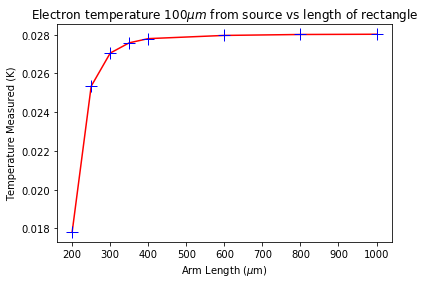

In [38]:
markersize=2
plt.plot(arm_length, val[0],c='r')
plt.plot(arm_length, val[0],'+', markersize=12.0,c='b')

plt.title("Electron temperature $100\mu m$ from source vs length of rectangle")
plt.xlabel('Arm Length ($\mu$m)')
plt.ylabel('Temperature Measured (K)')
plt.show()

## Temperature Space for different mesh size